# Intro to Machine Learning

### Predicting Heart disease from a single feature
We will read in the heart disease data and build a simple logistic regression model with a single predictor variable for predicting heart disease.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100
%matplotlib inline

## Read in the Heart Disease data

In [2]:
heart = pd.read_csv('data/heart.csv')
heart.head()

,slope,thal,rest_bp,chest_pain,num_major_vessels,sugar,rest_ekg,chol,oldpeak,sex,age,max_heart_rate,angina,disease
0,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0


Let's choose the max heart rate as the feature to learn from.

In [4]:
heart1 = heart[['max_heart_rate', 'disease']]
heart1.head()

,max_heart_rate,disease
0,170,0
1,158,0
2,162,1
3,181,1
4,145,0


### Count number of missing values
Can only train data that has no missing values.

In [5]:
heart1.isna().sum()

# NOTE: You can't have ANY missing values to do ML in scikitlearn

max_heart_rate    0
disease           0
dtype: int64

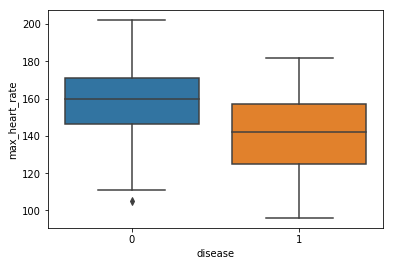

In [6]:
sns.boxplot(x='disease', y='max_heart_rate', data=heart1)

# Put data into NumPy arrays
By convention, use **`X`** and **`y`** as Python variable names. Use the **`values`** attribute to get NumPy arrays.

In [7]:
X = heart1['max_heart_rate'].values
y = heart1['disease'].values

# This is necessary because NumPy and Pandas are not necessarily updated on the same cycles and there may be incompatibilities.

In [8]:
type(X)

numpy.ndarray

In [9]:
type(y)

numpy.ndarray

In [10]:
X[:5]

array([170, 158, 162, 181, 145])

In [2]:
y[:5]

NameError: name 'y' is not defined

# Ready for machine learning in 3 steps

1. Import the model
2. Instantiate the model (aka actually building the model)
3. Train the model

# Step 1: Import the model from Scikit-Learn
When we import the model, its like we have been given a blueprint of how to build a model, but haven't built it just yet.

In [12]:
from sklearn.linear_model import LogisticRegression

# Step 2: Instantiate the estimator
This creates a single instance of the logistic regression class.

In [13]:
logr = LogisticRegression()

# Step 3: Train the model
All scikit-learn estimators use the **`fit`** method to train the model.

In [14]:
logr.fit(X, y)

#scikit learn demands your data have TWO dimensions

ValueError: Expected 2D array, got 1D array instead:
array=[ 170.  158.  162.  181.  145.  150.  157.  112.  140.  158.  151.  178.
  158.  152.  182.  126.  175.  144.  202.  152.  162.  147.  142.  138.
  143.  115.  159.  184.  155.  123.  168.  114.  155.  154.  165.  186.
  173.  163.  121.  161.  137.  172.  130.  157.  167.  141.  166.  125.
  103.  172.  120.  162.  132.  142.  169.  179.  126.   99.  162.  177.
  160.  142.  103.  138.  159.  156.  109.  181.  161.  139.  170.  143.
  162.  170.  134.  165.  169.  109.  142.  147.  152.  113.  168.  130.
  149.  126.  172.  162.  174.  155.  162.  125.  170.  170.  175.  151.
  132.  131.  148.  162.  182.  153.  142.  142.  133.  122.  165.  145.
  125.  166.  105.  162.  122.  150.  179.  165.  132.  158.  132.  106.
  174.  192.  148.  173.  108.  151.  122.  147.  125.   96.  154.  122.
  172.  173.  171.  140.  150.  154.  180.  188.  111.  162.  173.  114.
  131.  179.  178.  145.  152.  150.  156.  152.  130.  153.   97.  125.
  151.  139.  169.  132.  171.  160.  145.  147.  111.  172.  168.  144.
  150.  144.  111.  132.  140.  173.  160.  163.  117.  131.  175.  163.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# A very annoying Gotcha! from scikit-learn
Scikit-Learn forces you to use a 2-dimensional array for your input values. When we selected one column above into our X array, it was a single dimension. 

In [15]:
X.ndim

1

In [16]:
X.shape

(180,)

## Use the help from the error message to put our input array in the correct shape

In [17]:
X = X.reshape(-1, 1)
X[:5]

array([[170],
       [158],
       [162],
       [181],
       [145]])

In [18]:
X.shape

(180, 1)

In [19]:
X.ndim

2

# Now, we can train our model

In [20]:
logr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Our model is ready to use!
All machine learning models are built in different ways. Different algorithms are used to train the model. The algorithms have an objective function that they use as their guide for learning. Once they have satisfied the objective function, the model is trained.

### Make a prediction
All supervised learning estimators in scikit-learn have a **`predict`** method. Let's use it to make some predictions of heart disease.

In [21]:
logr.predict(130)

array([1])

In [22]:
logr.predict(200)

array([0])

## Make a prediction for all inputs

In [23]:
logr.predict(X)
#note there's a method that can output the probability, not just the 0 or 1, see "predict_proba" below

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [33]:
y[:]
#the original outputs from the data 

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0])

# Find out our accuracy - 66% Not bad!
Use the `score` method, which by default, returns the accuracy for classification problems.

In [24]:
logr.score(X, y)

0.66111111111111109

# The actual model for logistic regression
The final model for logistic regression is an equation for a cumulative probability distribution function. We can get the intercept and coefficients of our model with the **`intercept_`** and **`coef_`** attributes.

In [25]:
logr.intercept_

array([ 2.39558999])

In [26]:
logr.coef_

array([[-0.0179435]])

# Logistic Regression returns a probably
Although our `logr` model returned 0's and 1's above, it really is producing a probability and if this number is greater than .5 then it returns a 1 or else it returns a 0.

# See the underlying probabilities with `predict_proba`
Let's get the probabilities for all values between the min and max `max_heart_rate`.

In [27]:
heart['max_heart_rate'].min()

96

In [28]:
heart['max_heart_rate'].max()

202

In [29]:
x = np.arange(95, 205)
x = x.reshape(-1, 1)

### `predict_proba` returns an array with the probabilities of being in each class for each row
Since we only have two classes, we will have two values for each row.

In [30]:
probs = logr.predict_proba(x)
probs[:5]

array([[ 0.33382001,  0.66617999],
       [ 0.33782219,  0.66217781],
       [ 0.34184772,  0.65815228],
       [ 0.34589617,  0.65410383],
       [ 0.34996707,  0.65003293]])

In [34]:
probs[:]

array([[ 0.33382001,  0.66617999],
       [ 0.33782219,  0.66217781],
       [ 0.34184772,  0.65815228],
       [ 0.34589617,  0.65410383],
       [ 0.34996707,  0.65003293],
       [ 0.35405995,  0.64594005],
       [ 0.35817432,  0.64182568],
       [ 0.36230968,  0.63769032],
       [ 0.36646552,  0.63353448],
       [ 0.37064133,  0.62935867],
       [ 0.37483657,  0.62516343],
       [ 0.3790507 ,  0.6209493 ],
       [ 0.38328315,  0.61671685],
       [ 0.38753337,  0.61246663],
       [ 0.39180078,  0.60819922],
       [ 0.39608479,  0.60391521],
       [ 0.40038481,  0.59961519],
       [ 0.40470022,  0.59529978],
       [ 0.40903042,  0.59096958],
       [ 0.41337478,  0.58662522],
       [ 0.41773266,  0.58226734],
       [ 0.42210343,  0.57789657],
       [ 0.42648643,  0.57351357],
       [ 0.43088102,  0.56911898],
       [ 0.43528651,  0.56471349],
       [ 0.43970225,  0.56029775],
       [ 0.44412755,  0.55587245],
       [ 0.44856174,  0.55143826],
       [ 0.45300412,

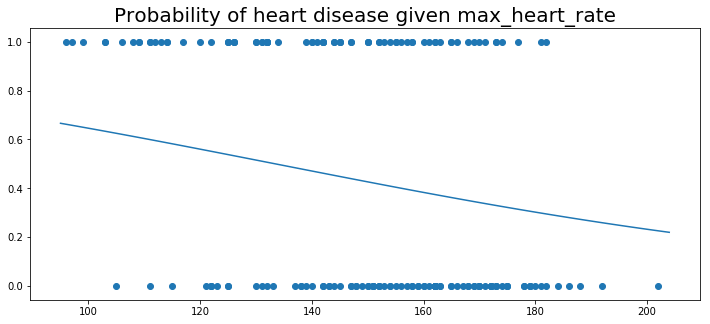

In [31]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x, probs[:, 1])
ax.set_title('Probability of heart disease given max_heart_rate', fontsize=20);
ax.scatter(X, y)

# Compute the exact model on our own

![][1]

[1]: images/logr.png

In [ ]:
#above equation is how it calculates the probability

In [35]:
def compute_probs(x):
    x1 = logr.intercept_ + logr.coef_ * x
    return 1 / (1 + np.exp(-x1))

In [36]:
my_probs = compute_probs(x)
my_probs[:5]

array([[ 0.66617999],
       [ 0.66217781],
       [ 0.65815228],
       [ 0.65410383],
       [ 0.65003293]])

# Isn't logistic regression supposed to draw an S curve?
Yes, but there wasn't much signal with the feature we chose, so curve had a very shallow slope. If we gave a wider range of the x values, you would see S curve.

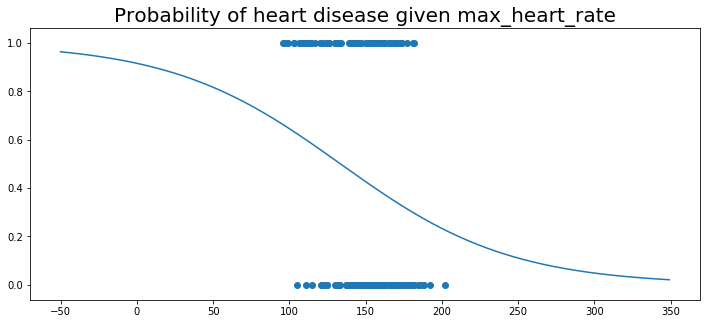

In [37]:
x = np.arange(-50, 350)
x = x.reshape(-1, 1)
probs = compute_probs(x)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x, probs)
ax.set_title('Probability of heart disease given max_heart_rate', fontsize=20);
ax.scatter(X, y)

# Exercise
* Select another column to build and train a single-feature logistic regression model
* Make predictions
* Find your accuracy. Can you beat 66%?
* Draw the probability curve on the scatterplot
* Repeat for more columns

In [44]:
heart2 = heart[['chol','rest_bp', 'disease']]
heart2.head()

,chol,rest_bp,disease
0,308,128,0
1,214,110,0
2,304,125,1
3,223,152,1
4,270,178,0


In [68]:
heart4 = heart[['chol', 'rest_bp', 'rest_ekg', 'max_heart_rate', 'sex','age','disease']]
heart4.head()

,chol,rest_bp,rest_ekg,max_heart_rate,sex,age,disease
0,308,128,2,170,male,45,0
1,214,110,0,158,female,54,0
2,304,125,2,162,male,77,1
3,223,152,0,181,male,40,1
4,270,178,2,145,male,59,0


In [75]:
X2 = heart2['chol'].values
X3 = heart2['rest_bp'].values
X4 = heart2[['chol','rest_bp']].values
X5 = heart4[['chol', 'rest_bp', 'rest_ekg', 'max_heart_rate','age']].values
y2 = heart2['disease'].values
y3 = heart4['disease'].values

In [47]:
X2[:10]

array([308, 214, 304, 223, 270, 180, 258, 276, 326, 219])

In [50]:
X3[:10]

array([128, 110, 125, 152, 178, 130, 150, 150, 170, 120])

In [54]:
X4[:10]

array([[308, 128],
       [214, 110],
       [304, 125],
       [223, 152],
       [270, 178],
       [180, 130],
       [258, 150],
       [276, 150],
       [326, 170],
       [219, 120]])

In [70]:
X5[:10]

array([[308, 128, 2, 170, 'male', 45],
       [214, 110, 0, 158, 'female', 54],
       [304, 125, 2, 162, 'male', 77],
       [223, 152, 0, 181, 'male', 40],
       [270, 178, 2, 145, 'male', 59],
       [180, 130, 0, 150, 'male', 42],
       [258, 150, 2, 157, 'female', 60],
       [276, 150, 2, 112, 'male', 57],
       [326, 170, 2, 140, 'male', 59],
       [219, 120, 0, 158, 'female', 50]], dtype=object)

In [48]:
y[:10]

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [72]:
y3[:10]

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logr2 = LogisticRegression()

In [55]:
logr2.fit(X4, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
logr2.predict(X4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
logr2.score(X4, y)

0.5444444444444444

In [73]:
logr3 = LogisticRegression()

In [76]:
logr2.fit(X5, y3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
logr2.predict(X5)

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [78]:
logr2.score(X5, y3)

0.65555555555555556